In [ ]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# pd.set_option('display.max_rows', 15)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Read and Preprocess the Data**

In [ ]:
# Read the dataset
file_path = '/content/drive/MyDrive/Datasets/nlp/IMDB Dataset.csv'
df = pd.read_csv(file_path)
df.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


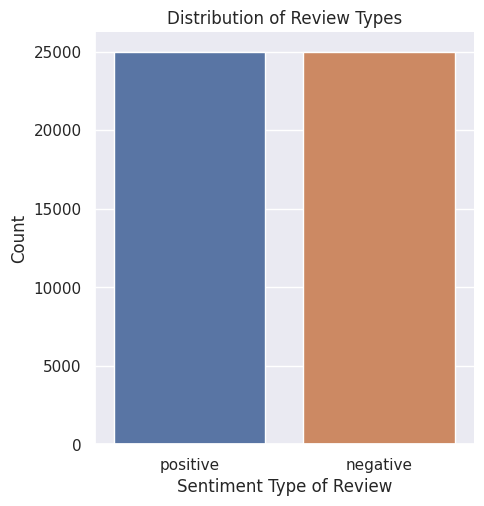

In [ ]:
# Visualize distribution of target
sns.catplot(x='sentiment', hue='sentiment', kind='count', data=df, legend=False)
plt.title('Distribution of Review Types')
plt.xlabel('Sentiment Type of Review')
plt.ylabel('Count');

In [ ]:
# Assign the target
X = df['review']
y = df['sentiment']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **2. Bag of Words Aplication**

In [ ]:
# Initialize BOW vectorizer
vectorizer_bow = CountVectorizer(stop_words='english')   # we remove English stopwords, but I suppose there are other languages besides English
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

# Show the shape of the BOW matrix
X_train_bow.shape

(40000, 92692)

In [ ]:
len(vectorizer_bow.get_feature_names_out())

92692

In [ ]:
vectorizer_bow.get_feature_names_out()[3000:3050]

array(['aish', 'aisha', 'aishu', 'aishwariya', 'aishwarya', 'aishwarys',
       'aisi', 'aisle', 'aisles', 'aisling', 'aislinn', 'aissa', 'ait',
       'aiw', 'aj', 'aja', 'ajax', 'ajay', 'ajda', 'ajeeb', 'aji',
       'ajikko', 'ajit', 'ajita', 'ajnabi', 'ajooba', 'ak', 'ak47',
       'ak47s', 'aka', 'akai', 'akane', 'akas', 'akasha', 'akathe',
       'akayla', 'akbar', 'akcent', 'akeem', 'akeli', 'akelly', 'akemi',
       'akenaten', 'akerman', 'akhenaten', 'akhnaton', 'akhras', 'akhtar',
       'aki', 'akiji'], dtype=object)

**Ми отримали вектори 92692 унікальних токенів з 40000 відгуків, 50 з яких я вивів у друк у попередній секції**

## **3. TF/IDF Application**

In [ ]:
# Initialize TF/IDF vectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

# Show the shape of the TF/IDF matrix
X_train_tfidf.shape

(40000, 92692)

In [ ]:
vectorizer_tfidf.get_feature_names_out()[3000:3050]

array(['aish', 'aisha', 'aishu', 'aishwariya', 'aishwarya', 'aishwarys',
       'aisi', 'aisle', 'aisles', 'aisling', 'aislinn', 'aissa', 'ait',
       'aiw', 'aj', 'aja', 'ajax', 'ajay', 'ajda', 'ajeeb', 'aji',
       'ajikko', 'ajit', 'ajita', 'ajnabi', 'ajooba', 'ak', 'ak47',
       'ak47s', 'aka', 'akai', 'akane', 'akas', 'akasha', 'akathe',
       'akayla', 'akbar', 'akcent', 'akeem', 'akeli', 'akelly', 'akemi',
       'akenaten', 'akerman', 'akhenaten', 'akhnaton', 'akhras', 'akhtar',
       'aki', 'akiji'], dtype=object)

## **4. Classification Model (Multinomial Naive Bayes)**

In [ ]:
def train_and_evaluate(X_train, X_test, y_train, y_test, title_plot):
  '''
  Train and evaluate text classificator for pos and
  neg text sentiment
  '''
  model = MultinomialNB()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Arrange report
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred, output_dict=True, zero_division=False)

  # Visualize metrics
  classes = list(report.keys())[:-3]
  metrics = ['precision', 'recall', 'f1-score']

  # Write data on class, metric and values
  data = []
  for cls in classes:
      for metric in metrics:
          data.append((cls, metric, report[cls][metric]))

  # Create new dataset for the report
  df_ = pd.DataFrame(data, columns=['class', 'metric', 'value'])

  # Plot result
  plt.figure(figsize=(8, 4))
  sns.barplot(x='class', y='value', hue='metric', data=df_)
  plt.title(title_plot)
  plt.show()

  return accuracy, report

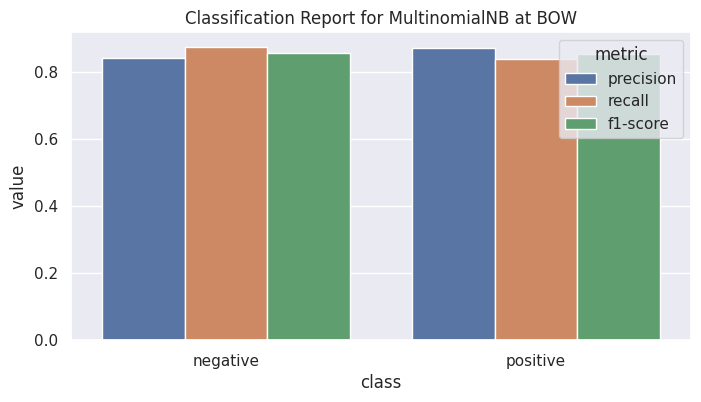

In [ ]:
# Fit the model on BOW vectorization
accuracy_bow, report_bow = train_and_evaluate(X_train_bow, X_test_bow, y_train, y_test, "Classification Report for MultinomialNB at BOW")

In [ ]:
print(f"Bag Of Words Model Accuracy: {accuracy_bow},\nClassification Report: \n{report_bow}")

Bag Of Words Model Accuracy: 0.8565,
Classification Report: 
{'negative': {'precision': 0.8417991469561845, 'recall': 0.8752267687966135, 'f1-score': 0.8581875679414962, 'support': 4961.0}, 'positive': {'precision': 0.8721602643535729, 'recall': 0.8380631077594761, 'f1-score': 0.8547717842323652, 'support': 5039.0}, 'accuracy': 0.8565, 'macro avg': {'precision': 0.8569797056548787, 'recall': 0.8566449382780448, 'f1-score': 0.8564796760869307, 'support': 10000.0}, 'weighted avg': {'precision': 0.8570981140127285, 'recall': 0.8565, 'f1-score': 0.8564663545304652, 'support': 10000.0}}


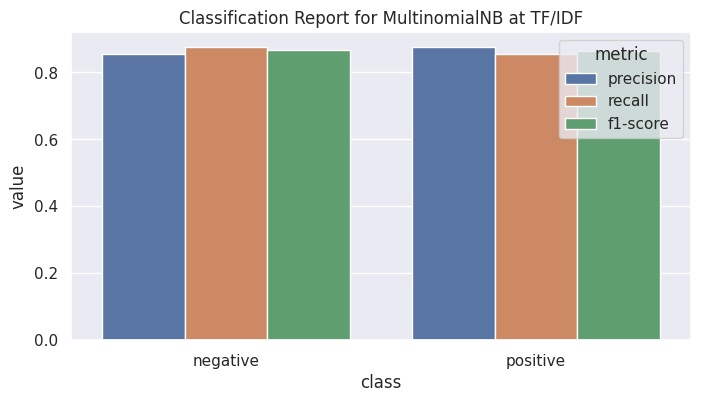

In [ ]:
accuracy_tfidf, report_tfidf = train_and_evaluate(X_train_tfidf, X_test_tfidf, y_train, y_test, "Classification Report for MultinomialNB at TF/IDF")

In [ ]:
print(f"TF/IDF Model Accuracy: {accuracy_tfidf},\nClassification Report: \n{report_tfidf}")

TF/IDF Model Accuracy: 0.8652,
Classification Report: 
{'negative': {'precision': 0.8554003541215818, 'recall': 0.8764362023785527, 'f1-score': 0.8657905217045002, 'support': 4961.0}, 'positive': {'precision': 0.8753304860687411, 'recall': 0.854137725739234, 'f1-score': 0.8646042587384493, 'support': 5039.0}, 'accuracy': 0.8652, 'macro avg': {'precision': 0.8653654200951615, 'recall': 0.8652869640588934, 'f1-score': 0.8651973902214747, 'support': 10000.0}, 'weighted avg': {'precision': 0.8654431476097554, 'recall': 0.8652, 'f1-score': 0.865192763795907, 'support': 10000.0}}


**Кращі метрики F1 score отримані на векторизаторі TF/IDF**

In [ ]:
############################ END OF NOTEBOOK ####################################